<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/autoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Reshape, Conv2DTranspose, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, )
from tensorflow.keras.optimizers import Adam

In [2]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


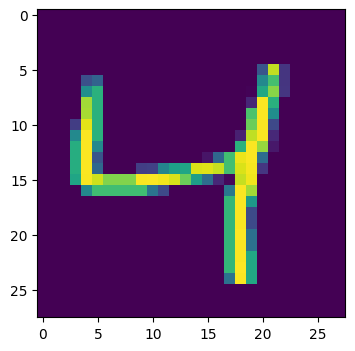

In [3]:
plt.figure(figsize = (4,4))
i=2
plt.imshow((x_train[i]))

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

len(x_train)

60000

In [5]:
x_train.shape[1:]

(28, 28)

In [6]:
np.prod(x_train.shape[1:])

784

In [7]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
# This is our input image, unrolled to a vector
input = keras.Input(shape=(784,))

# This is the size of our latent representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

encoder = layers.Dense(encoding_dim, activation='relu')(input)
decoder = layers.Dense(784, activation='sigmoid')(encoder)

autoencoder = keras.Model(input, decoder)

In [9]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Let's also create a separate encoder model:
only_encoder = keras.Model(input, encoder)

In [11]:
only_encoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Let's also create a separate decoder model:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
only_decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [13]:
only_decoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
autoencoder.compile(optimizer='adam', loss=('mean_squared_error'))

In [15]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.1083 - val_loss: 0.0414
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0378 - val_loss: 0.0293
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0280 - val_loss: 0.0233
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0226 - val_loss: 0.0192
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0188 - val_loss: 0.0163
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0160 - val_loss: 0.0142
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0142 - val_loss: 0.0129
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0130 - val_loss: 0.0120
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0111 - val_loss: 0.0106
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s

In [16]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = only_encoder.predict(x_test)
decoded_imgs = only_decoder.predict(encoded_imgs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [56]:
encoded_imgs[1]

array([ 4.981185 , 10.153325 ,  7.635938 ,  3.3426201,  8.521429 ,
        5.56931  ,  8.101604 ,  4.9807367,  8.666557 ,  6.1331034,
       24.565882 , 14.425773 ,  3.734302 ,  6.1866717,  5.627737 ,
       15.077058 ,  9.159391 ,  7.089481 ,  7.990501 , 10.704482 ,
       12.797177 , 12.697502 ,  8.569704 ,  4.8246474,  3.263173 ,
       14.736521 ,  0.       ,  0.5935353,  9.857342 , 10.813353 ,
       14.506408 , 10.969291 ], dtype=float32)

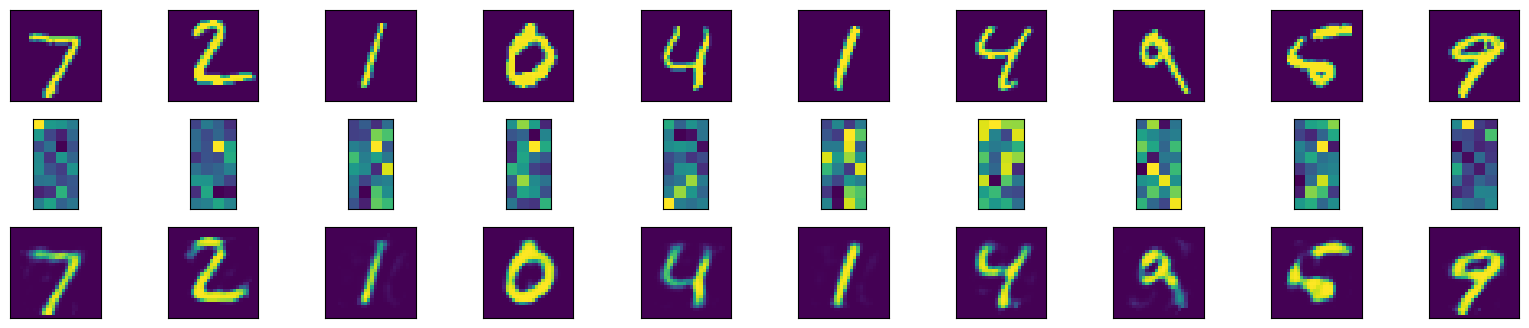

In [18]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display latent space representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + n+n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [71]:
#a = np.random.rand(32)
#b = np.random.rand(32)
#a = np.random.uniform(low = 0.0, high = 30.0, size = 32)
#b = np.random.uniform(low = 0.0, high = 25.0, size = 32)


In [72]:
#a=a.astype('float32')
#b=b.astype('float32')


In [73]:
#newList = np.array([a,b])

In [74]:
#newList

In [75]:
#decoded_img_extra = only_decoder.predict(newList)

In [76]:
#plt.figure(figsize=(20, 4))
#plt.imshow(decoded_img_extra[0].reshape(28, 28))
#plt.show()